In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from utils import timeseries_formatting, basic_formatting, get_okabe_ito_palette

prop = mpl.font_manager.FontProperties('Roboto')
mpl.rcParams['font.sans-serif'] = prop.get_name()
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.weight']=300
mpl.rcParams['axes.labelweight']=300
mpl.rcParams['font.size']=16

COLOR = '#343434'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

# Supplemental figure 6: Epidemiological waves in San Diego
Basic plot showing our definition of the waves and troughs in daily reported COVID-19 case counts in San Diego.

Read in case data for San Diego county.

In [2]:
sd = pd.read_csv( "../analyses/estimated-importation-risk/sd-cases.csv", usecols=["location", "date", "cases"], parse_dates=["date"] )
sd = sd.loc[sd["location"]=="San Diego County"]
sd["cases"] = sd["cases"].rolling( 7, min_periods=1 ).mean()
sd.head()

,location,date,cases
0,San Diego County,2020-02-12,0.000000
1,San Diego County,2020-02-13,0.500000
2,San Diego County,2020-02-14,0.333333
3,San Diego County,2020-02-15,0.250000
4,San Diego County,2020-02-16,0.200000


Plot Supplemental figure S4.

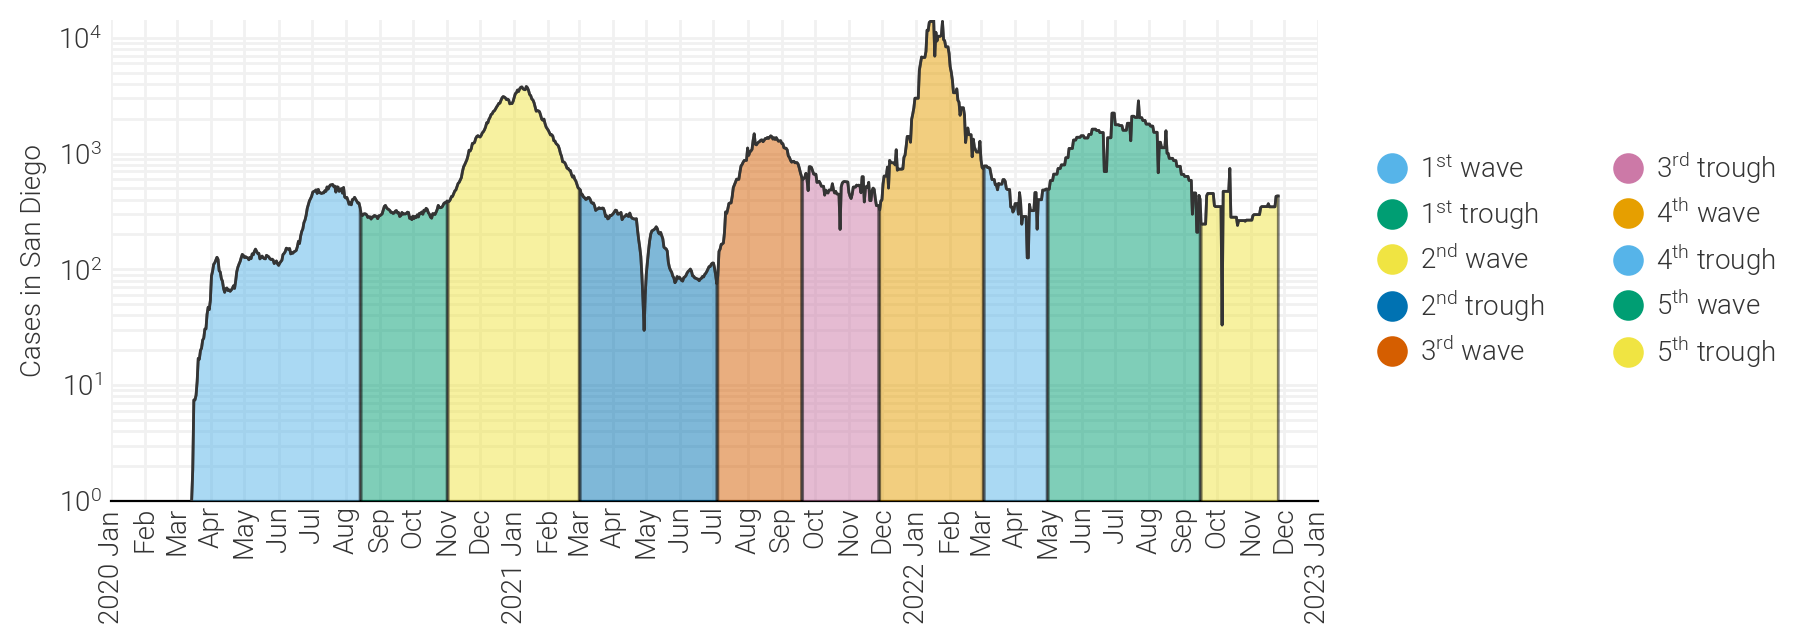

In [4]:
fig, ax = plt.subplots( dpi=200, figsize=(10,3.5) )

waves = [
    ('$\mathregular{1^{st}}$ wave', ["2020-08-15"]),
    ('$\mathregular{1^{st}}$ trough', ["2020-08-15", "2020-11-02"]),
    ('$\mathregular{2^{nd}}$ wave', ["2020-11-02", "2021-03-02"]),
    ('$\mathregular{2^{nd}}$ trough', ["2021-03-02", "2021-07-05"]),
    ('$\mathregular{3^{rd}}$ wave', ["2021-07-05", "2021-09-20"]),
    ('$\mathregular{3^{rd}}$ trough', ["2021-09-20", "2021-11-29"]),
    ('$\mathregular{4^{th}}$ wave', ["2021-11-29", "2022-03-04"]),
    ('$\mathregular{4^{th}}$ trough', ["2022-03-04", "2022-05-01"]),
    ('$\mathregular{5^{th}}$ wave', ["2022-05-01", "2022-09-17"]),
    ('$\mathregular{5^{th}}$ trough', ["2022-09-17", "2022-11-30"])
]

colors = get_okabe_ito_palette()
count = 0
legend = []
for name, date_range in waves:
    if len( date_range ) == 1:
        temp = sd.loc[sd.date < date_range[0]]
    else:
        try:
            temp = sd.loc[( date_range[0] <= sd["date"] ) & ( sd["date"] < date_range[1] )]
        except TypeError:
            print( date_range )
            print( name )
            raise
    count += 1
    if count == len( colors ):
        count = 0
    ax.fill_between( temp["date"], temp["cases"], color=colors[count], linewidth=1, edgecolor="black", zorder=10+count, alpha=0.5 )
    legend.append( Line2D([0], [0], linestyle='none', marker='o', color=colors[count], label=name, markersize=10 ) )
ax.plot( sd.loc[sd["date"]<"2022-11-30","date"], sd.loc[sd["date"]<"2022-11-30","cases"], color=COLOR, linewidth=1, zorder=100 )

ax.set_yscale( "log" )


basic_formatting( ax, ylabel="Cases in San Diego", which="both", ylims=(1,14250), xlims=( pd.to_datetime("2020-01-01"), pd.to_datetime("2023-01-01") ), ysize=10, xsize=10 )
timeseries_formatting( ax )
ax.legend( loc="center right", handles=legend, frameon=False, ncol=2, handletextpad=0, fontsize=10, bbox_to_anchor=(0,0,1.4,1) )

plt.tight_layout()
fig.savefig( "../paper/figures/suppfigure6.pdf" )
fig.savefig( "../paper/figures/suppfigure6.png" )
#plt.savefig( "../analyses/plots/san-diego-waves.pdf" )
plt.show()